# Импорт библиотек


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# Генерация данных

In [60]:
def create_data(noised=False, verbose=False):
    xs = np.linspace(0, 10, 100)
    ys = 2 * xs + np.random.random(100) * 2 + np.random.randint(3) * int(noised)

    if noised:
        ys[25:45] *= 2

    if verbose:
        plt.scatter(xs, ys)
        plt.show()

    return pd.DataFrame({'X': xs, 'y': ys}, columns=['X', 'y'])

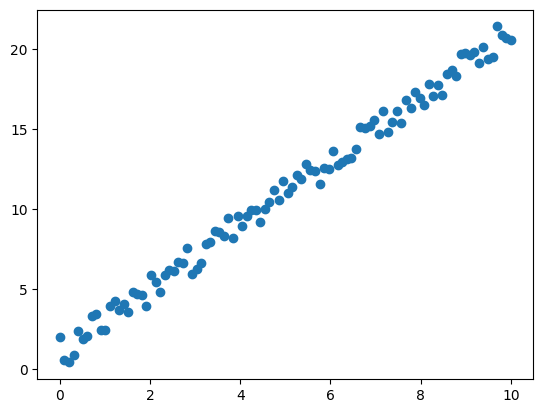

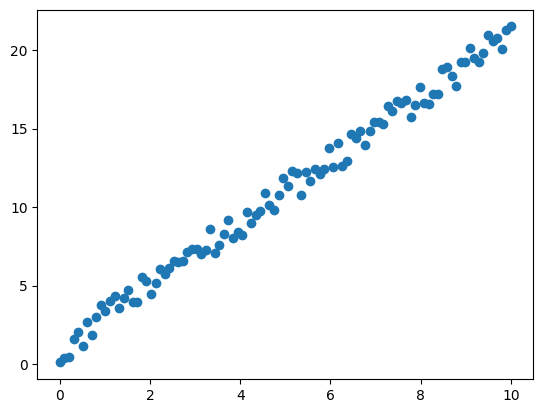

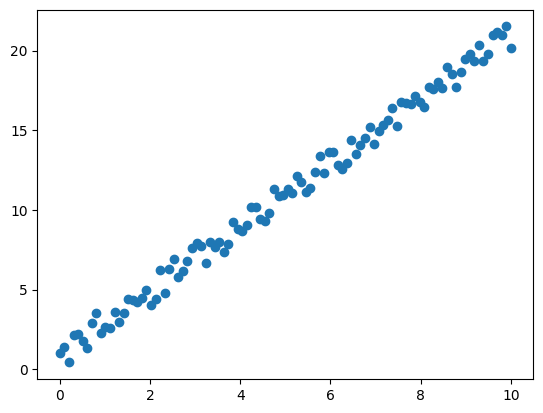

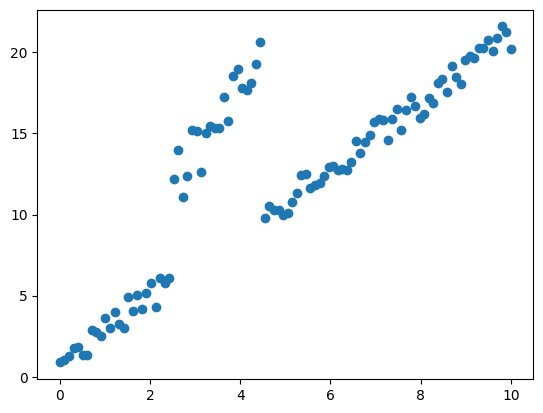

In [61]:
datasets = [create_data(noised=(i % 4 == 0), verbose=True) for i in range(1, 5)]

for i in range(1, len(datasets) + 1):
    datasets[i - 1].to_csv('dataset_' + str(i) + '.csv', index=False)

# Тестирование

In [85]:
%%writefile test_model.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import  r2_score as r2


def get_data(dataset_name):
    DF = pd.read_csv(dataset_name)
    return pd.DataFrame(DF['X']), DF['y']


def test_dataset():
    X_train, y_train = get_data('dataset_1.csv')
    model = LinearRegression()
    model.fit(X_train, y_train)

    for i in range(2, 5):
        X_test, y_test = get_data('dataset_' + str(i) + '.csv')
        MSE = mse(model.predict(X_test), y_test)
        assert MSE < 1, f"Датасет 'dataset_{str(i)}.csv' содержит неверные, MSE {MSE}!"

Overwriting test_model.py


In [86]:
!pytest -v test_model.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                                                   

test_model.py::test_dataset FAILED                                                           [100%]

============================================= FAILURES =============================================
___________________________________________ test_dataset ___________________________________________

    def test_dataset():
        X_train, y_train = get_data('dataset_1.csv')
        model = LinearRegression()
        model.fit(X_train, y_train)
    
        for i in range(2, 5):
            X_test, y_test = get_data('dataset_' + str(i) + '.csv')
            MSE = mse(model.predict(X_test), y_test)
>           assert MSE < 1, f"Датасет 'dataset